In [21]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from IPython.core.display import display, Markdown

C:\Users\mapet\AppData\Local\Temp\ipykernel_55220\348716861.py:9: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



<h3 style='text-align: center; font-weight: bold;'>Yearly Lynchings: 1882-1968</h3>

In [11]:
# Read the data from the CSV file

df = pd.read_csv('yearly_population_lynchings.csv')

In [12]:
# Change the "Year" column to a datetime object

df["Year"] = pd.to_datetime(df["Year"], format="%Y")

In [13]:
# Look at first few rows of the data

df.head()

,Year,Whites,Blacks,Total
0,1882-01-01,64,49,113
1,1883-01-01,77,53,130
2,1884-01-01,160,51,211
3,1885-01-01,110,74,184
4,1886-01-01,64,74,138


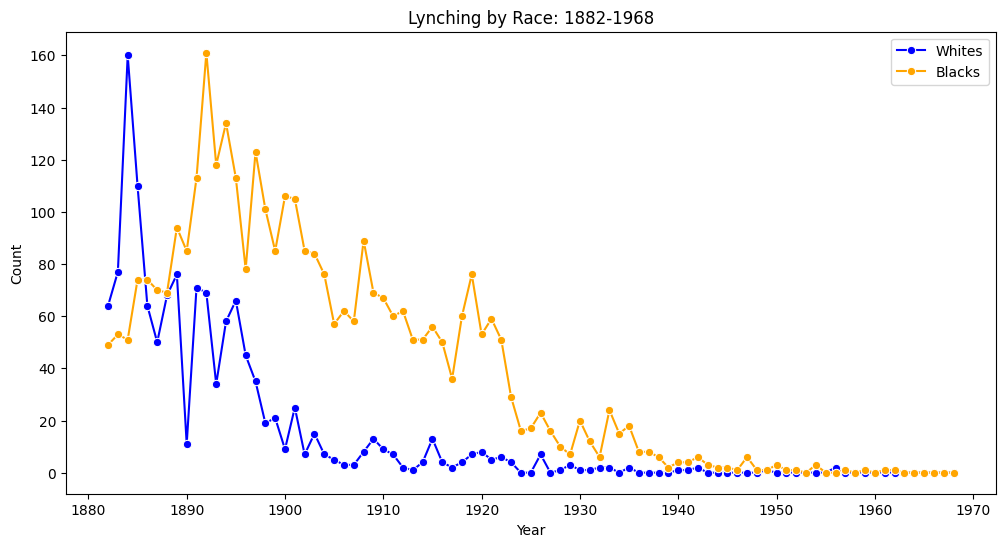

In [14]:
# Plot with Whites in blue and Blacks in default color

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Whites", marker="o", label="Whites", color="blue")
sns.lineplot(data=df, x="Year", y="Blacks", marker="o", label="Blacks", color="orange")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Lynching by Race: 1882-1968")
plt.legend()
plt.show()

<h3 style='text-align: center; font-weight: bold;'> State Level Lynchings Between 1882-1968 </h3>

In [15]:
# Read the data from the CSV file

df_states = pd.read_csv('state_level_lynchings.csv')

In [16]:
# Mapping Full State Names to Abbreviations

state_abbreviations = {
    "Alabama": "AL", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO",
    "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "South Carolina": "SC", "South Dakota": "SD",
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

In [17]:
# Apply abbreviation mapping

df_states["State_Abbrev"] = df_states["State"].map(state_abbreviations)

In [18]:
# Define tick intervals (e.g., every 100 for a cleaner legend)

tick_interval = 100
max_value = df_states["Total"].max()

# Create evenly spaced tick values

tick_values = np.arange(0, max_value + tick_interval, tick_interval)

# Create a Plotly Choropleth Map with Yellow-to-Red Colors
fig = px.choropleth(
    df_states,
    locations="State_Abbrev",  
    locationmode="USA-states",
    color="Total",
    color_continuous_scale="YlOrRd",  # Change to Yellow-to-Red scale
    scope="usa",
    hover_name="State",
    labels={"Total": "Lynchings"}
)


fig.update_layout(
    title={
        "text": "Lynchings by State (Choropleth Map)",
        "x": 0.5,  
        "xanchor": "center",
        "yanchor": "top",
    },
    width=800,  
    height=500,
    coloraxis_colorbar={
        "title": "Lynchings per State",
        "tickvals": tick_values.tolist(), 
        "ticktext": [str(int(v)) for v in tick_values]  
    }
)

# Show the updated map

fig.show()

<h3 style='text-align: center; font-weight: bold;'> Reasons For Lynchings: 1882-1968 </h3>

In [19]:
# Read the data from the CSV file

df_causes = pd.read_csv('lynching_causes.csv')

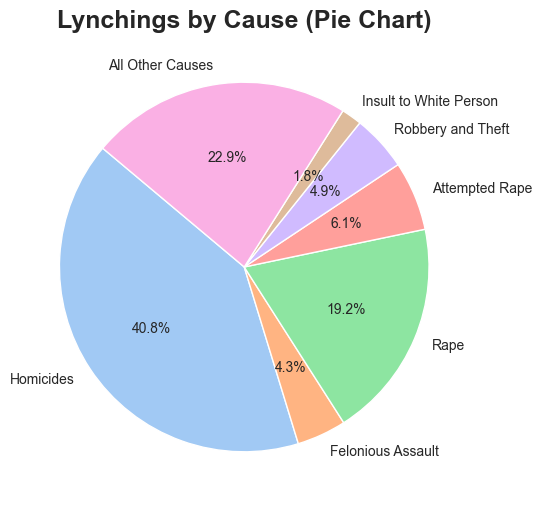

In [23]:
# Set Seaborn style

sns.set_style("darkgrid")

# Create a smaller pie chart

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(
    df_causes["Count"], 
    labels=df_causes["Cause"], 
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel", len(df_causes)), 
    startangle=140
)

# Center the title and make it bigger

ax.set_title("Lynchings by Cause (Pie Chart)", fontsize=18, fontweight="bold")

# Display the chart

plt.show()